Import Packages Needed

In [1441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

Pull in Main Dataset

In [1442]:
df=pd.read_csv(r'C:\Users\Jake\Desktop\Bellevue Items\Assignments\Applied Data Science\Project 1\gun-violence-data_01-2013_03-2018.csv')
df

incident_id        date           state city_or_county  \
0            461105  2013-01-01    Pennsylvania     Mckeesport   
1            460726  2013-01-01      California      Hawthorne   
2            478855  2013-01-01            Ohio         Lorain   
3            478925  2013-01-05        Colorado         Aurora   
4            478959  2013-01-07  North Carolina     Greensboro   
...             ...         ...             ...            ...   
239672      1083142  2018-03-31       Louisiana          Rayne   
239673      1083139  2018-03-31       Louisiana   Natchitoches   
239674      1083151  2018-03-31       Louisiana         Gretna   
239675      1082514  2018-03-31           Texas        Houston   
239676      1081940  2018-03-31           Maine   Norridgewock   

                                          address  n_killed  n_injured  \
0       1506 Versailles Avenue and Coursin Street         0          4   
1                    13500 block of Cerise Avenue         1          3   
2                           1776 East 28th Street         1          3   
3                16000 block of East Ithaca Place         4          0   
4                       307 Mourning Dove Terrace         2          2   
...                                           ...       ...        ...   
239672         North Riceland Road and Highway 90         0          0   
239673                             247 Keyser Ave         1          0   
239674                  1300 block of Cook Street         0          1   
239675                     12630 Ashford Point Dr         1          0   
239676                           434 Skowhegan Rd         2          0   

                                             incident_url  \
0       http://www.gunviolencearchive.org/incident/461105   
1       http://www.gunviolencearchive.org/incident/460726   
2       http://www.gunviolencearchive.org/incident/478855   
3       http://www.gunviolencearchive.org/incident/478925   
4       http://www.gunviolencearchive.org/incident/478959   
...                                                   ...   
239672  http://www.gunviolencearchive.org/incident/108...   
239673  http://www.gunviolencearchive.org/incident/108...   
239674  http://www.gunviolencearchive.org/incident/108...   
239675  http://www.gunviolencearchive.org/incident/108...   
239676  http://www.gunviolencearchive.org/incident/108...   

                                               source_url  \
0       http://www.post-gazette.com/local/south/2013/0...   
1       http://www.dailybulletin.com/article/zz/201301...   
2       http://chronicle.northcoastnow.com/2013/02/14/...   
3       http://www.dailydemocrat.com/20130106/aurora-s...   
4       http://www.journalnow.com/news/local/article_d...   
...                                                   ...   
239672  http://www.klfy.com/news/local/rayne-woman-cha...   
239673  http://www.ksla.com/story/37854648/man-wanted-...   
239674  http://www.nola.com/crime/index.ssf/2018/04/sh...   
239675  https://www.chron.com/news/houston-texas/houst...   
239676  https://www.centralmaine.com/2018/03/31/police...   

        incident_url_fields_missing  congressional_district  \
0                             False                    14.0   
1                             False                    43.0   
2                             False                     9.0   
3                             False                     6.0   
4                             False                     6.0   
...                             ...                     ...   
239672                        False                     NaN   
239673                        False                     4.0   
239674                        False                     2.0   
239675                        False                     9.0   
239676                        False                     2.0   

                    gun_stolen                gun_type  \
0                          NaN               

Examine Columns

In [1443]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

Identify Null Entries

In [1444]:
print(df.isnull().sum())

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

Identify data types for respective columns

In [1445]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

Since we're using DBScan which revolves on euclidean distances, let's investigate those columns with non-numerical data to determine if they need to be one-hot encoded or removed entirely: <br>
incident_id: drop, irrelevant to actual incident occurring<br>
date: drop, no real good starting point for numerical differences, too specific for one-hot encoding<br>
State: one-hot-encode<br>
city_or_county: drop, too specific for one-hot encoding<br>
address: drop, too specific for one-hot encoding<br>
incident_url: drop, irrelevant to actual incident occurring<br>
source_url: drop, irrelevant to actual incident occurring<br>
incident_url_fields_missing: drop, irrelevant to actual incident occurring<br>
congressional_district: drop, too specific for one-hot encoding<br>
gun_stolen: keep, parse out as true or false if any are labeled as "Stolen"<br>
gun_type: parse out, one hot encode all others than "Unknown"<br>
incident_characteristics: keep, one hot encode all event types<br>
location_description: drop, too specific for one-hot encoding<br>
notes: drop, too specific for one-hot encoding<br>
participant_age: keep, identify perps from participant_type, average if multiple perps<br>
participant_age_group: drop, too vague in comparison to previous column<br>
participant_gender: identify perps from participant_type, one-hot encode for both genders<br>
participant_name: drop for privacy<br>
participant_relationship: drop, very few rows actually filled in<br>
participant_status: drop, already included in n_killed/n_injured<br>
participant_type: drop after use in other columns, we're only looking at suspects to cluster<br>
sources: drop, irrelevant to actual incident occurring<br>
state_house_district: too specific for one-hot encoding<br>
state_senate_district: too specific for one-hot encoding<br>

Let's start by dropping those columns that we can so we don't carry unnecessary columns forward

In [1446]:
df=df.drop(['incident_id', 'date', 'city_or_county', 'address', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'location_description', 'notes', 'participant_age_group', 'participant_name', 'participant_relationship', 'participant_status', 'sources', 'state_house_district', 'state_senate_district'], axis=1)
df.columns

Index(['state', 'n_killed', 'n_injured', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_gender', 'participant_type'],
      dtype='object')

Alright, let the column fixing commence. Let's start with one-hot-encoding state.

In [1447]:
df = pd.concat([df,pd.get_dummies(df['state'])],axis=1)
df.drop(['state'],axis=1, inplace=True)

In [1448]:
df.columns

Index(['n_killed', 'n_injured', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_gender', 'participant_type', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

Up next: Parsing gun_stolen from a listing such as "0::Unknown||1::Unknown" to False and if any include 'Stolen', set to True, we'll assume the firearm is not stolen in case it was not listed.

In [1449]:
df.gun_stolen=df.gun_stolen.fillna('nope')
df.loc[df['gun_stolen'].str.contains('Stolen', case=True, na=False), 'gun_stolen'] = 1
df.loc[(~df['gun_stolen'].str.contains('Stolen', case=True, na=True)), 'gun_stolen'] = 0

In [1450]:
df['gun_stolen'].describe()

count     239677
unique         2
top            0
freq      232320
Name: gun_stolen, dtype: int64

Now onto a slightly tougher one, we want to one-hot encode all gun types, but first we need to get them out of the ugly syntax of "0:Handgun||1:Handgun", "0:22 LR||1:Rifle". Only way I can think is pretty manual, but let's go for it. First let's fill the nas with "Unknown"

In [1451]:
df.gun_type=df.gun_type.fillna('0::Unknown')

Alright, now let's find all the different types of guns we can have

In [1452]:
all_guns=[]
for row in df.index:
    guns=df['gun_type'][row].split('||')
    for gun in guns:
        try:
            gun=gun[gun.index('::')+2:len(gun)]
            if(gun not in all_guns):
                all_guns.append(gun)
        except:
            guns=df['gun_type'][row].split('|')
            for gun in guns:
                gun=gun[gun.index(':')+1:len(gun)]
                if(gun not in all_guns):
                    all_guns.append(gun)

In [1453]:
all_guns[0]=all_guns[0]+' Gun'
print(all_guns)

['Unknown Gun', 'Handgun', '22 LR', '223 Rem [AR-15]', 'Shotgun', '9mm', '45 Auto', '12 gauge', '7.62 [AK-47]', '40 SW', '44 Mag', 'Other', '38 Spl', '380 Auto', '410 gauge', '32 Auto', '308 Win', 'Rifle', '357 Mag', '16 gauge', '30-30 Win', '25 Auto', '20 gauge', '10mm', '30-06 Spr', '300 Win', '28 gauge']


Alright, now that we've got all gun types, let's one-hot-encode the values to new columns. First we have to make them

In [1454]:
for gun_type in all_guns:
    df[gun_type]=0

Now if the gun type is found in the cells, set the appropriate value to 1 in the new columns.

In [1455]:
for row in df.index:
    for gun in all_guns:
        if(gun in df['gun_type'][row]):
            df[gun][row]=1

<ipython-input-1455-d9f701c40e3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[gun][row]=1


In [1456]:
#spot check
print(df['223 Rem [AR-15]'][6])
print(df['Handgun'][4])
print(df['Handgun'][6])

1
1
0


Now let's drop the gun_type column

In [1457]:
df.drop(['gun_type'],axis=1, inplace=True)

Rocking it. Let's move on to our next column, Incident Characteristics. Another hard one, but now we can kind of apply the cookie cutter with slight variations as new format is "Shot - Wound/Injured||Shot - Dead(murder, accidental, suicide)||". So no more "::" nor counting, just a simpler || delimiter. Let's first set our nonetype values to unknown.

In [1458]:
df.incident_characteristics=df.incident_characteristics.fillna('Unknown')

In [1459]:
all_incidents=[]
for row in df.index:
    try:
        incidents=df['incident_characteristics'][row].split('||')
        for incident in incidents:
            if '|' in incident:
                incidentsinner=incident.split('|')
                for inc in incidentsinner:
                    if inc not in all_incidents:
                        all_incidents.append(inc)
            else:
                if(incident not in all_incidents):
                    all_incidents.append(incident)
    except:
        print(df['incident_characteristics'][row])

In [1460]:
print(all_incidents)

['Shot - Wounded/Injured', 'Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)', 'Possession (gun(s) found during commission of other crimes)', 'Possession of gun by felon or prohibited person', 'Shot - Dead (murder, accidental, suicide)', 'Gang involvement', 'Shots Fired - No Injuries', 'Bar/club incident - in or around establishment', 'Officer Involved Incident', 'Officer Involved Shooting - subject/suspect/perpetrator killed', 'Drug involvement', 'Kidnapping/abductions/hostage', 'Under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator )', 'Suicide^', 'Murder/Suicide', 'Attempted Murder/Suicide (one variable unsuccessful)', 'Domestic Violence', 'Home Invasion', 'Home Invasion - Resident killed', 'Armed robbery with injury/death and/or evidence of DGU found', 'Drive-by (car to street, car to car)', 'Officer Involved Shooting - Officer shot', 'Officer Involved Shooting - Officer killed', 'Officer Involve

Wow that's a lot of different events. Let's drop the column for now, otherwise the column number and processing time is gonna explode. If the algorithm performance later is poor, we can come back and one-hot these.

In [1461]:
df.drop(['incident_characteristics'],axis=1, inplace=True)

Next: participant_age, need to link up the suspect to the age given here. First, let's fill those na values with "Unknown" and drop all rows that have no suspects linked up as these should get rid of accidental shootings and tsa actions.

In [1462]:
df.participant_age=df.participant_age.fillna('Unknown Age')

In [1463]:
df.participant_type=df.participant_type.fillna('Unknown Type')

In [1464]:
df.participant_gender=df.participant_gender.fillna('Unknown Gender')

In [1465]:
print(len(df))
df=df.loc[df['participant_type'].str.contains('Suspect')]
print(len(df))

239677
143172


Now that we've got only rows with a suspect involved, we can link up our ages by finding which number correlates to the suspect(s). If multiple participants are subjects, we'll average their ages. If no ages are found for any suspects, we'll set the age to zero. If multiple suspects, and one does not have age, we'll set the missing age(s) to the valid age known.

In [1466]:
#iterate over each row
for row in df.index:
    #some rows are delimited by ||
    if('||' in df['participant_type'][row]):
        pars=df['participant_type'][row].split('||')
        susnums=[]
        #grab each 'participant'
        for par in pars:
            if  'Suspect' in par:
                #if they're a suspect, then add the number of the participant to list so we can pull out lines from other columns
                susnums.append(int(par[:par.index('::')]))
        #once we have list of participant numbers that are suspects, we can work with other columns
        #grab participant age column
        ac=df['participant_age'][row]
        #iterate over suspect numbers
        ages_to_ave=[]
        for sus in susnums:
            #add ages of suspect(s) to list and average them if multiple. If no suspect age found, enter 0 for participant age
            if '||' in ac:
                try:
                    start_index=ac.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        start_index=ac.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        ages_to_ave.append('Unknown')
                        continue
                try:
                    end_index=ac[start_index:].index('||')+start_index
                except:
                    end_index=len(ac)
            elif '|' in ac:
                try:
                    start_index=ac.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        start_index=ac.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        ages_to_ave.append('Unknown')
                        continue
                try:
                    end_index=ac[start_index:].index('|')+start_index
                except:
                    end_index=len(ac)
            else:
                try:
                    start_index=ac.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        start_index=ac.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        ages_to_ave.append('Unknown')
                        continue
                end_index=len(ac)
            age_to_add=ac[start_index:end_index]
            ages_to_ave.append(int(age_to_add))
            
        #if any suspect age was unknown
        if('Unknown' in ages_to_ave):
            sata=set(ages_to_ave)
            #if all suspect ages are unknown, set to zero for par_age
            if(len(sata)==1):
                df['participant_age'][row]=0
            #otherwise, if there are valid ages as well as unknown, remove unknowns and average valid ages
            else:
                count=0
                for age in ages_to_ave:
                    if(age=='Unknown'):
                        count=count+1
                for c in range(count):
                    ages_to_ave.remove('Unknown')
                df['participant_age'][row]=mean(ages_to_ave)
        #if no suspect ages are unknown, set the par_age equal to average of ages. Else statement would be if no suspects, shouldnt happen
        else:
            if(len(ages_to_ave)>0):
                df['participant_age'][row]=mean(ages_to_ave)
            else:
                df['participant_age'][row]=0
              

            
    #all others are delimited by either | or only have one entry, either should work here
    else:
        pars=df['participant_type'][row].split('|')
        susnums=[]
        #grab each 'participant'
        for par in pars:
            if 'Suspect' in par:
                try:
                    #if they're a suspect, then add the number of the participant to list so we can pull out lines from other columns
                    susnums.append(int(par[:par.index('::')]))
                except:
                    #some are delimited by single colon in these oddball rows
                    susnums.append(int(par[:par.index(':')]))
                #once we have list of participant numbers that are suspects, we can work with other columns
        #grab participant age column
        ac=df['participant_age'][row]

        #iterate over suspect numbers
        ages_to_ave=[]
        for sus in susnums:
            #add ages of suspect(s) to list and average them if multiple. If no suspect age found, enter 0 for participant age
            if '||' in ac:
                try:
                    start_index=ac.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        start_index=ac.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        ages_to_ave.append('Unknown')
                        continue
                try:
                    end_index=ac[start_index:].index('||')+start_index
                except:
                    end_index=len(ac)
            elif '|' in ac:
                try:
                    start_index=ac.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        start_index=ac.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        ages_to_ave.append('Unknown')
                        continue
                try:
                    end_index=ac[start_index:].index('|')+start_index
                except:
                    end_index=len(ac)
            else:
                try:
                    start_index=ac.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        start_index=ac.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        ages_to_ave.append('Unknown')
                        continue
                end_index=len(ac)
            age_to_add=ac[start_index:end_index]
            ages_to_ave.append(int(age_to_add))
                                   
        if('Unknown' in ages_to_ave):
            sata=set(ages_to_ave)
            if(len(sata)==1):
                df['participant_age'][row]=0
            else:
                count=0
                for age in ages_to_ave:
                    if age=='Unknown':
                        count=count+1
                for c in range(count):
                    ages_to_ave.remove('Unknown')
                df['participant_age'][row]=mean(ages_to_ave)
        else:
            if(len(ages_to_ave)>0):
                df['participant_age'][row]=mean(ages_to_ave)
            else:
                df['participant_age'][row]=0

<ipython-input-1466-ee9c6b6a3ada>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_age'][row]=0
<ipython-input-1466-ee9c6b6a3ada>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_age'][row]=mean(ages_to_ave)
<ipython-input-1466-ee9c6b6a3ada>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_age'][row]=mean(ages_to_ave)
<ipython-input-1466-ee9c6b6a3ada>:156: SettingWithCopyWarning: 
A va

In [1467]:
print(df['participant_age'][16])
print(df['participant_type'][7])

20.666666666666668
0::Victim||1::Victim||2::Victim||3::Victim||4::Victim||5::Subject-Suspect


Now let's do the same for participant gender

In [1468]:
#iterate over each row
for row in df.index:
    #some rows are delimited by ||
    if('||' in df['participant_type'][row]):
        pars=df['participant_type'][row].split('||')
        susnums=[]
        #grab each 'participant'
        for par in pars:
            if  'Suspect' in par:
                #if they're a suspect, then add the number of the participant to list so we can pull out lines from other columns
                susnums.append(int(par[:par.index('::')]))
        gc=df['participant_gender'][row]
        genders=[]
        for sus in susnums:
                #now find genders
            if '||' in gc:
                try:
                    si=gc.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        si=gc.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        genders.append('Unknown')
                        continue
                try:
                    ei=gc[si:].index('||')+si
                except:
                    ei=len(gc)
            elif '|' in gc:
                try:
                    si=gc.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        si=gc.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        genders.append('Unknown')
                        continue
                try:
                    ei=gc[si:].index('|')+si
                except:
                    ei=len(gc)
            else:
                try:
                    si=gc.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        si=gc.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        genders.append('Unknown')
                        continue
                ei=len(gc)
            genders.append(gc[si:ei])
        #if any suspect gender was unknown
        if('Unknown' in genders):
            sg=set(genders)
            if(len(sg)==1):
                df['participant_gender'][row]='Unknown'
            elif((len(sg)==2) and ('Male' in sg)):
                df['participant_gender'][row]='Male'
            elif((len(sg)==2) and ('Female' in sg)):
                df['participant_gender'][row]='Female'
            else:
                df['participant_gender'][row]='Both'
        else:
            sg=set(genders)
            if((len(sg)==1) and ('Male' in sg)):
                df['participant_gender'][row]='Male'
            elif((len(sg)==1) and ('Female' in sg)):
                df['participant_gender'][row]='Female'
            else:
                df['participant_gender'][row]='Both'  


    else:
        pars=df['participant_type'][row].split('|')
        susnums=[]
        #grab each 'participant'
        for par in pars:
            if 'Suspect' in par:
                try:
                    #if they're a suspect, then add the number of the participant to list so we can pull out lines from other columns
                    susnums.append(int(par[:par.index('::')]))
                except:
                    #some are delimited by single colon in these oddball rows
                    susnums.append(int(par[:par.index(':')]))
                #once we have list of participant numbers that are suspects, we can work with other columns
        #grab participant gender column
        gc=df['participant_gender'][row]
        genders=[]
        #now find genders
        for sus in susnums:
            if '||' in gc:
                try:
                    si=gc.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        si=gc.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        genders.append('Unknown')
                        continue
                try:
                    ei=gc[si:].index('||')+si
                except:
                    end_index=len(gc)
            elif '|' in gc:
                try:
                    si=gc.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        si=gc.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        genders.append('Unknown')
                        continue
                try:
                    ei=gc[si:].index('|')+si
                except:
                    ei=len(gc)
            else:
                try:
                    si=gc.index((str(sus)+'::'))+len(str(sus))+2
                except:
                    try:
                        si=gc.index((str(sus)+':'))+len(str(sus))+1
                    except:
                        genders.append('Unknown')
                        continue
                ei=len(gc)
            genders.append(gc[si:ei])
                                #if any suspect gender was unknown
        if('Unknown' in genders):
            sg=set(genders)
            if(len(sg)==1):
                df['participant_gender'][row]='Unknown'
            elif((len(sg)==2) and ('Male' in sg)):
                df['participant_gender'][row]='Male'
            elif((len(sg)==2) and ('Female' in sg)):
                df['participant_gender'][row]='Female'
            else:
                df['participant_gender'][row]='Both'
        else:
            sg=set(genders)
            if((len(sg)==1) and ('Male' in sg)):
                df['participant_gender'][row]='Male'
            elif((len(sg)==1) and ('Female' in sg)):
                df['participant_gender'][row]='Female'
            else:
                df['participant_gender'][row]='Both'

<ipython-input-1468-fae3d83f3e89>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Unknown'
<ipython-input-1468-fae3d83f3e89>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Male'
<ipython-input-1468-fae3d83f3e89>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Female'
<ipython-input-1468-fae3d83f3e89>:59: SettingWithCopyWarning: 
A value 

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
b

<ipython-input-1468-fae3d83f3e89>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Both'



0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bott

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gend

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it othe

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Femal

<ipython-input-1468-fae3d83f3e89>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Female'



0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
botto

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0:Male|1:Male
1
bottom made it |
1:Male
1
bottom made it other
1:Male
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
1
bottom made it |
0:Female|1:Male
1
bottom made it |
2:Male
2
bottom made it other
2:Male
0:Male|1:Male
1
bottom made it |
1:Male
1
bottom made it other
1:Male
0:Male|1:Male|2:Male|3:Male
0
bottom made it |
0:Male|1:Male|2:Male|3:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male
3
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male|2:Female
1
bottom made it |
0:Male|1:Male|2:Female
2
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male
1
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
1
bottom made it |
0:Male|1:Female|2:Female|4:Male|5:Female
4
bottom made it |
0:

<ipython-input-1468-fae3d83f3e89>:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Both'
<ipython-input-1468-fae3d83f3e89>:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Male'


1
bottom made it |
0:Female|2:Male|3:Male
2
bottom made it |
0:Female|2:Male|3:Male
3
bottom made it |
0:Male|1:Female|2:Male|3:Male
2
bottom made it |
0:Male|1:Female|2:Male|3:Male
3
bottom made it |
0:Female|1:Male
1
bottom made it |
1:Male|2:Male
0
bottom made it |
1:Male|2:Male
1
bottom made it |
1:Male|2:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male
3
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
1
bottom made it other
Unknown Gender
Unknown Gender
2
bottom made it other
Unknown Gender
Unknown Gender
3
bottom made it other
Unknown Gender
Unknown Gender
4
bottom made it other
Unknown Gender
1:Male
1
bottom made it other
1:Male
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
1
bottom made it |
0:Female|1:Female|2:Male|3:Female|4:Male
4
bottom made it |
0:Male|1:Male
1
bottom made 

Unknown Gender
2
bottom made it other
Unknown Gender
1:Male
1
bottom made it other
1:Male
1:Male
1
bottom made it other
1:Male
0:Female
0
bottom made it other
0:Female
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Female|1:Male
1
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Female|1:Male
1
bottom made it |
1:Male|2:Male
1
bottom made it |
1:Male|2:Male
2
bottom made it |
0:Male|1:Female
1
bottom made it |
Unknown Gender
1
bottom made it other
Unknown Gender
Unknown Gender
2
bottom made it other
Unknown Gender
0:Male|1:Male
0
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
1:Male
1
bottom made it other
1:Male
0:Male|1:Male|2:Male|3:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male
3
bottom made it |
Unknown Gender
1
bottom made it other
Unknown Gender
0:Male|1:Male|2:Male|3:Male|4:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Ma

1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|5:Male|6:Male
5
bottom made it |
0:Male|5:Male|6:Male
6
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
0
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
1:Male
1
bottom made it other
1:Male
0:Male|1:Female|2:Male
2
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Female|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
1
bottom made it |
0:Female|1:Male|2:Male
1
bottom made it |
0:Female|1:Male|2:Male
2
bottom made it |
Unknown Ge

bottom made it |
0:Male|1:Male
1
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|3:Male
1
bottom made it |
0:Male|3:Male
2
bottom made it |
0:Male|3:Male
3
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
0
bottom made it |
0:Male|1:Male
1
bottom made it |
1:Male
1
bottom made it other
1:Male
2:Male|3:Male|4:Female
2
bottom made it |
2:Male|3:Male|4:Female
3
bottom made it |
2:Male|3:Male|4:Female
4
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male|2:Male|3:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male
3
bottom made it |
0:Male|1:Female|2:Male
2
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
1:Male|2:Male
1
bottom made it |
1:Male|2:Male
2
bottom made it |
1:Male|2:Male
3
bottom made it |
0:Male|1:Male
1
bottom made it |
1:Male
1
bottom made it other


<ipython-input-1468-fae3d83f3e89>:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Both'



1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
1:Male
1
bottom made it other
1:Male
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Male
3
bottom made it |
0:Male|1:Male
1
bottom made it |
1:Male|2:Male
2
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
0
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Female|1:Male|2:Male
1
bottom made it |
0:Female|1:Male|2:Male
2
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Female|1:Male|2:Female
0
bottom made it |
0:Female|1:Male|2:Fema

2
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male|2:Female|3:Male
1
bottom made it |
0:Male|1:Male|2:Female|3:Male
2
bottom made it |
0:Male|1:Male|2:Female|3:Male
3
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
Unknown Gender
1
bottom made it other
Unknown Gender
0:Male
0
bottom made it other
0:Male
0:Male|1:Female
0
bottom made it |
0:Male|1:Female
1
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male|2:Female
1
bottom made it |
0:Male|1:Male|2:Female
2
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Female
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Male|2:Female
1
bottom made it |
0:Male|1:Male|2:Female
2
bottom made it |
bottomelse
{'Female', 'Male'}
3:Male
3
bottom made it other
3:Male
0:Female|1:Male
1
bottom made it |
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Female|1:Male|2:Male
1
bottom made it |
0:Female|1:Male|2:Ma

<ipython-input-1468-fae3d83f3e89>:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['participant_gender'][row]='Female'


0:Male
0
bottom made it other
0:Male
0:Male|1:Male|2:Female
0
bottom made it |
0:Male|1:Male|2:Female
1
bottom made it |
0:Male|1:Male|2:Female
2
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male|2:Male|3:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male
3
bottom made it |
0:Female|1:Male|2:Male
2
bottom made it |
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
1
bottom made it other
Unknown Gender
Unknown Gender
2
bottom made it other
Unknown Gender
Unknown Gender
3
bottom made it other
Unknown Gender
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|2:Female
1
bottom made it |
0:Male|2:Female
2
bottom made it |
0:Male
1
bottom made it other
0:Male
0:Female|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Female|2:Male
2
bottom made it |
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Female|1

4:Male
4
bottom made it other
4:Male
0:Male
0
bottom made it other
0:Male
0:Male|1:Female
0
bottom made it |
0:Male|1:Female
1
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Male
0
bottom made it other
0:Male
Unknown Gender
1
bottom made it other
Unknown Gender
1:Male
1
bottom made it other
1:Male
2:Male|3:Male|4:Male
1
bottom made it |
2:Male|3:Male|4:Male
2
bottom made it |
2:Male|3:Male|4:Male
3
bottom made it |
2:Male|3:Male|4:Male
4
bottom made it |
1:Male
1
bottom made it other
1:Male
0:Male|1:Male|2:Female
2
bottom made it |
0:Female|1:Female|2:Male
2
bottom made it |
0:Male|1:Female|2:Male|3:Male
1
bottom made it |
0:Male|1:Female|2:Male|3:Male
2
bottom made it |
0:Male|1:Female|2:Male|3:Male
3
bottom made it |
bottomelse
{'Female', 'Male'}
Unknown Gender
0
bottom made it other
Unknown Gender
0:Male|1:Male
1
bottom made it |
0::Male
0
bottom made it other
0::Male
2:Male
2
bottom made it other
2:Ma

0:Male|1:Male|2:Female
1
bottom made it |
0:Male|1:Male|2:Female
2
bottom made it |
bottomelse
{'Female', 'Male'}
0:Female|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
Unknown Gender
1
bottom made it other
Unknown Gender
0:Male|1:Male|2:Male|3:Male|4:Male|5:Male|6:Male|7:Male|8:Male
7
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male|5:Male|6:Male|7:Male|8:Male
8
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Female|1:Male
0
bottom made it |
0:Female|1:Male
1
bottom made it |
bottomelse
{'Female', 'Male'}
0:Male|1:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Male|1:Female
2
bottom made it |
0:Male|1:Female
3
bottom made it |
0:Male|1:Female
4
bottom made it |
0:Male
1
bottom made it other
0:Male
0:Male
2
bottom made it other
0:Male
0:Female|1:Female
2
bottom made it |
0:Female|1:Female
3
bottom made it |
0:Male|2:Male
2
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
2
bottom made it 

0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Male|1:Male
1
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Male|1:Male|2:Female|3:Male|4:Male
3
bottom made it |
0:Male|1:Male|2:Female|3:Male|4:Male
4
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
3
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
4
bottom made it |
0:Male|1:Male|2:Male
0
bottom made it |
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Male|1:Male|2:Male
3
bottom made it |
0:Female|1:Male
1
bottom made it |
0:Male|1:Female
1
bottom made it |
1:Female
1
bottom made it other
1:Female
0:Male|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
0:Male|1:Female
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male
0
botto

0:Male
0
bottom made it other
0:Male
0:Female|1:Female|2:Male
2
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Male
0
bottom made it other
0:Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
1
bottom made it other
Unknown Gender
Unknown Gender
2
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0:Male|1:Male
0
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Male|1:Female
2
bottom made it |
0:Female|1:Male
1
bottom made it |
1:Male
1
bottom made it other
1:Male
0:Male
0
bottom made it other
0:Male
1:Male
1
bottom made it other
1:Male
0:Female|1:Male
1
bottom made it |
0:Male
0
bottom made it other
0:Male
0:Female
1
bottom made it other
0:Female
0:Male
0
bottom made it other
0:Male
0:Female|1:Male|2:Male
2
bottom made it |
1:Male|2:Female
1
bottom made it |
1:Male|2:Female
2
bottom made it |
bottomelse


0:Male|1:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male
3
bottom made it |
0:Male|1:Male|2:Male
1
bottom made it |
0:Male|1:Male|2:Male
2
bottom made it |
0:Female|1:Male|2:Male
2
bottom made it |
0:Male|1:Male|3:Male
1
bottom made it |
0:Male|1:Male|3:Male
2
bottom made it |
0:Male|1:Male|3:Male
3
bottom made it |
1:Male
1
bottom made it other
1:Male
0:Male
1
bottom made it other
0:Male
0:Male
2
bottom made it other
0:Male
0:Male|1:Male|2:Female
3
bottom made it |
0:Male|1:Male|2:Female
4
bottom made it |
0:Male|1:Male|2:Female
5
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
2
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
3
bottom made it |
0:Male|1:Male|2:Male|3:Male|4:Male
4
bottom made it |
5:Male|6:Male|7:Male
5
bottom made it |
5:Male|6:Male|7:Male
6
bottom made it |
5:Male|6:Male|7:Male
7
bottom made it |
0:Male|1:Male
1
bottom made it |
0:Male|1:Male|2:Male|3:Ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bot

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Fe

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
botto

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it oth

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bot

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
b

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Ma

Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bott

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unk

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made 

0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it oth

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::

bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::M

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bott

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bot

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Ma

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom m

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Fema

bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made i

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it othe

0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom m

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Fe

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bot

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unk

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0


0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom m

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bot

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gende

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it oth

0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male


0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom m

0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bott

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made 

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom m

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom m

0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male


0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0


0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it oth

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gende

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom 

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it o

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bott

0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gend

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom

0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::M

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Ma

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made 

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom m

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it oth

Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0


0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gen

0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
botto

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0:

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male

bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0


0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Female
0
bottom made it other
0::Female
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bott

0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
Unknown Gender
0
bottom made it other
Unknown Gender
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
bottom made it other
0::Male
0::Male
0
b

Let's spot-check some of these results.

In [1483]:
df.loc[df['participant_gender']=='Female']

n_killed  n_injured gun_stolen  latitude  longitude  n_guns_involved  \
0              0          4          0   40.3467   -79.8559              NaN   
4              2          2          0   36.1140   -79.9569              2.0   
15             0          5          0   35.0803   -89.8871              1.0   
80             2          2          0   35.0790   -89.9880              NaN   
119            0          9          0   40.6452   -73.9280              NaN   
...          ...        ...        ...       ...        ...              ...   
239448         0          0          0   34.4594   -97.0275              1.0   
239476         0          0          0   42.0995   -72.5593              1.0   
239487         0          0          1   36.4126   -77.6172              5.0   
239667         0          1          0   35.2045   -89.9872              1.0   
239672         0          0          0       NaN        NaN              1.0   

       participant_age participant_gender  \
0                    0             Female   
4                   47             Female   
15                  24             Female   
80                   0             Female   
119                  0             Female   
...                ...                ...   
239448               0             Female   
239476              27             Female   
239487              60             Female   
239667              35             Female   
239672              25             Female   

                                         participant_type  Alabama  Alaska  \
0       0::Victim||1::Victim||2::Victim||3::Victim||4:...        0       0   
4       0::Victim||1::Victim||2::Victim||3::Subject-Su...        0       0   
15      0::Victim||1::Victim||2::Victim||3::Victim||4:...        0       0   
80      0::Victim||1::Victim||2::Victim||3::Victim||4:...        0       0   
119     0::Victim||1::Victim||2::Victim||3::Victim||4:...        0       0   
...                                                   ...      ...     ...   
239448                                 0::Subject-Suspect        0       0   
239476                                 0::Subject-Suspect        0       0   
239487                                 0::Subject-Suspect        0       0   
239667                      0::Victim||1::Subject-Suspect        0       0   
239672                                 0::Subject-Suspect        0       0   

        Arizona  Arkansas  California  Colorado  Connecticut  Delaware  \
0             0         0           0         0            0         0   
4             0         0           0         0            0         0   
15            0         0           0         0            0         0   
80            0         0           0         0            0         0   
119           0         0           0         0            0         0   
...         ...       ...         ...       ...          ...       ...   
239448        0         0           0         0            0         0   
239476        0         0           0         0            0         0   
239487        0         0           0         0            0         0   
239667        0         0           0         0            0         0   
239672        0         0           0         0            0         0   

        District of Columbia  Florida  Georgia  Hawaii  Idaho  Illinois  \
0                          0        0        0       0      0         0   
4                          0        0        0       0      0         0   
15                         0        0        0       0      0         0   
80                         0        0        0       0      0         0   
119                        0        0        0       0      0         0   
...                      ...      ...      ...     ...    ...       ...   
239448                     0        0        0       0      0         0   
239476                     0        0        0       0      0         0   
23948

Comparing to original spreadsheet, looks pretty good. Now let's onehot encode those values. Should have four unique ones: 'Unknown', 'Male', 'Female', and 'Both'. Let's make sure that's the case before adding and removing par_gender column.

In [1484]:
print(pd.get_dummies(df['participant_gender']))

        Both  Female  Male  Unknown
0          0       1     0        0
1          0       0     0        1
2          0       0     1        0
3          0       0     1        0
4          0       1     0        0
...      ...     ...   ...      ...
239670     0       0     1        0
239671     0       0     1        0
239672     0       1     0        0
239673     0       0     1        0
239676     0       0     1        0

[143172 rows x 4 columns]


Looks great. Let's move forward with the encoding.

In [1485]:
df = pd.concat([df,pd.get_dummies(df['participant_gender'])],axis=1)
df.drop(['participant_gender'],axis=1, inplace=True)

In [1489]:
print(df.columns)

Index(['n_killed', 'n_injured', 'gun_stolen', 'latitude', 'longitude',
       'n_guns_involved', 'participant_age', 'participant_type', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Unknown Gun', 'Handgun',
       '22 LR', '223 Rem [AR-15]', 'Shotgun', '9mm', '45 Auto', '12 gauge',
       '7.62 [AK-47]', '40 SW', '44 Mag', 'Oth

Let's rename that unknown column to Unknown Gender to be more descript.

In [1490]:
df.rename(columns = {'Unknown':'Unknown Gender'}, inplace = True)
print(df.columns)

Index(['n_killed', 'n_injured', 'gun_stolen', 'latitude', 'longitude',
       'n_guns_involved', 'participant_age', 'participant_type', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Unknown Gun', 'Handgun',
       '22 LR', '223 Rem [AR-15]', 'Shotgun', '9mm', '45 Auto', '12 gauge',
       '7.62 [AK-47]', '40 SW', '44 Mag', 'Oth

Alright, with that being complete, that should round out our column fixes. Last thing to do is drop the participant_type column as it is no longer needed as all suspect information has been carried over to other columns.

In [1491]:
df.drop(['participant_type'],axis=1, inplace=True)

Let's check on the column types now.

In [1492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143172 entries, 0 to 239676
Data columns (total 89 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   n_killed              143172 non-null  int64  
 1   n_injured             143172 non-null  int64  
 2   gun_stolen            143172 non-null  object 
 3   latitude              137656 non-null  float64
 4   longitude             137656 non-null  float64
 5   n_guns_involved       90881 non-null   float64
 6   participant_age       143172 non-null  object 
 7   Alabama               143172 non-null  uint8  
 8   Alaska                143172 non-null  uint8  
 9   Arizona               143172 non-null  uint8  
 10  Arkansas              143172 non-null  uint8  
 11  California            143172 non-null  uint8  
 12  Colorado              143172 non-null  uint8  
 13  Connecticut           143172 non-null  uint8  
 14  Delaware              143172 non-null  uint8  
 15  

Looking pretty good there. Let's check for nas in those columns we did not manually manipulate.

In [1513]:
li=df.isna().sum()
li=li.to_dict()
for i in li:
    if(li[i]>0):
        print(i+' '+str(li[i]))

latitude 5516
longitude 5516
n_guns_involved 52291


To fill these in, we understand that this dataset is based on gun violence so at least one gun had to be involved. Thus if unknown, let's set this number to 1. For latitude and longitude, these are a smaller subset of the data, we could either set to zero or remove these. Let's set them to zero here.

In [1514]:
df.latitude=df.latitude.fillna(0)
df.longitude=df.longitude.fillna(0)
df.n_guns_involved=df.n_guns_involved.fillna(1)

Alright, we should be all set with data prep for now. Let's work on clustering these bad boys.

In [1516]:
#determine dimensionality for DBScan:
print(df.columns)

Index(['n_killed', 'n_injured', 'gun_stolen', 'latitude', 'longitude',
       'n_guns_involved', 'participant_age', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Unknown Gun', 'Handgun',
       '22 LR', '223 Rem [AR-15]', 'Shotgun', '9mm', '45 Auto', '12 gauge',
       '7.62 [AK-47]', '40 SW', '44 Mag', 'Other', '38 Spl', '380 

Unique dimensions (not describing same aspects) are n_killed, n_injured, gun_stolen, latitude, longitude, n_guns_involved, participant age, State, gun type, and gender. So dimension size is 10. We'll use 2*D or 20 for our min_pts value.

In [1517]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [1518]:
n=NearestNeighbors(n_neighbors=20) #2xdimensions
n_fit = n.fit(df)
distances, indices = n_fit.kneighbors(df)

In [1520]:
distances=np.sort(distances, axis=0)
distances=distances[:,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

(0.0, 10.0)

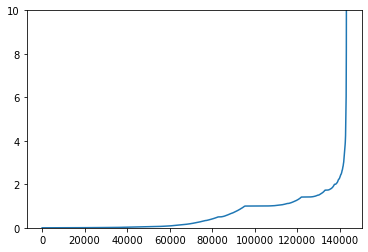

In [1527]:
fig, ax = plt.subplots()
ax.plot(distances)
ax.set_ylim(0, 10)

Looks like our elbow is at 2, we'll use that for our epsilon value. Let's get scanning.

In [1536]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [1539]:
scale_df=StandardScaler().fit_transform(df)
dbscan = DBSCAN(eps=2, min_samples=20)
model=dbscan.fit(scale_df)

In [1545]:
labels=model.labels_
from sklearn import metrics
import sys
np.set_printoptions(threshold=sys.maxsize)

In [1548]:
core_points = np.zeros_like(labels, dtype=bool)
core_points[dbscan.core_sample_indices_]=True
print(core_points)

[False False  True False False False False False  True False False False
 False  True False False False False False False False False  True False
 False  True False False False False False False  True False False False
  True False False False  True  True False False False False  True False
 False  True  True False  True False False False False  True False False
  True  True False False  True  True False  True  True  True  True  True
 False  True  True  True False False False False  True False False False
  True  True  True False False False False  True False False False False
 False  True False  True  True False  True False False  True False  True
 False False False False  True False  True False False False False False
 False False  True False False False False  True  True False False False
  True  True False False  True  True False False False False False False
  True False False False False  True False  True False  True False False
  True False  True  True False False False False Fa

In [1549]:
num_clusters=len(set(labels)) - (1 if -1 in labels else 0)
print(num_clusters)

474


In [1550]:
print(metrics.silhouette_score(scale_df, labels))

0.3981894906704979


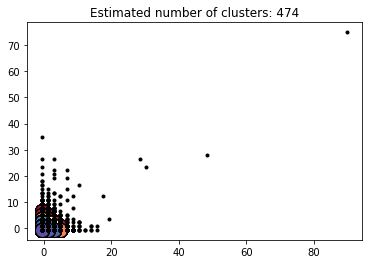

In [1562]:
colors=[plt.cm.Spectral(each) for each in np.linspace(0,1,len(set(labels)))]
fig, ax = plt.subplots()
for k, col in zip(set(labels), colors):
    if k==-1:
        col=[0,0,0,1]
    cmm=labels==k
    xy=scale_df[cmm & core_points]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        mfc=tuple(col),
        mec="k",
        markersize=14
    )
    
    xy=scale_df[cmm & ~core_points]
    ax.plot(
        xy[:,0],
        xy[:,1],
        "o",
        mfc=tuple(col),
        mec="k",
        markersize=3
    )
ax.set_title('Estimated number of clusters: %d' % num_clusters);